In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


### Part 1: Data Exploration and Preprocessing

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [6]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
print("Dataset information :")
df.info()

Dataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
print("Descrpitive Statistics")
df.describe()

Descrpitive Statistics


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
print("Selected Features (first 5 rows)")
data.head()

Selected Features (first 5 rows)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


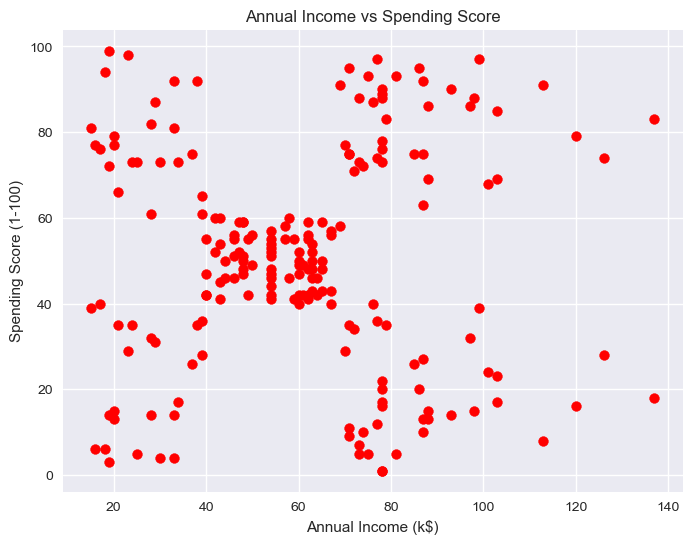

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c='red', s=50)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

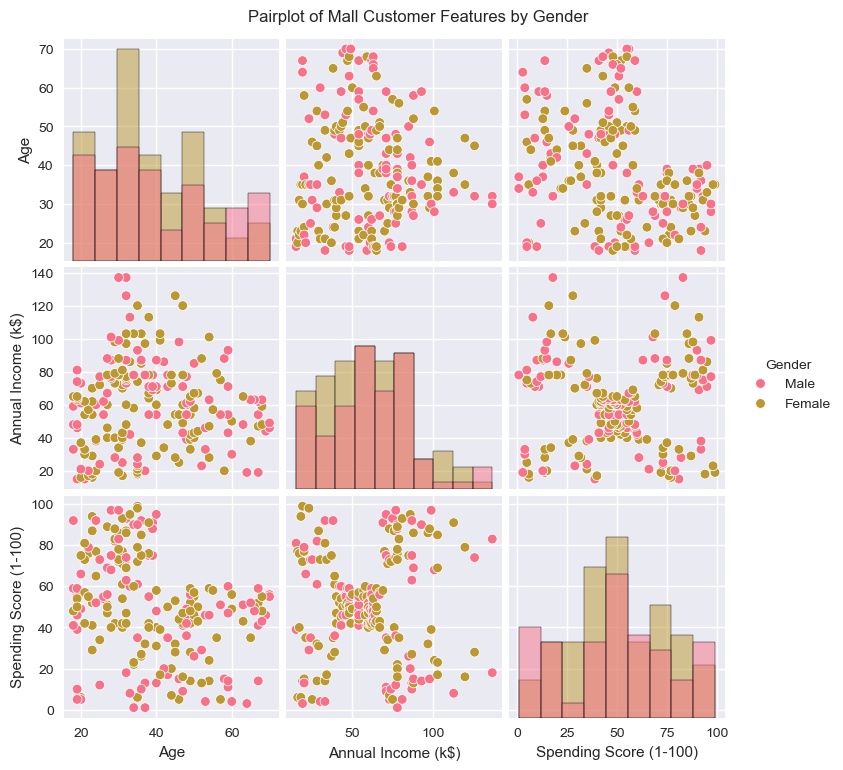

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], 
             hue='Gender', diag_kind='hist')

plt.suptitle('Pairplot of Mall Customer Features by Gender', y=1.02)
plt.show()


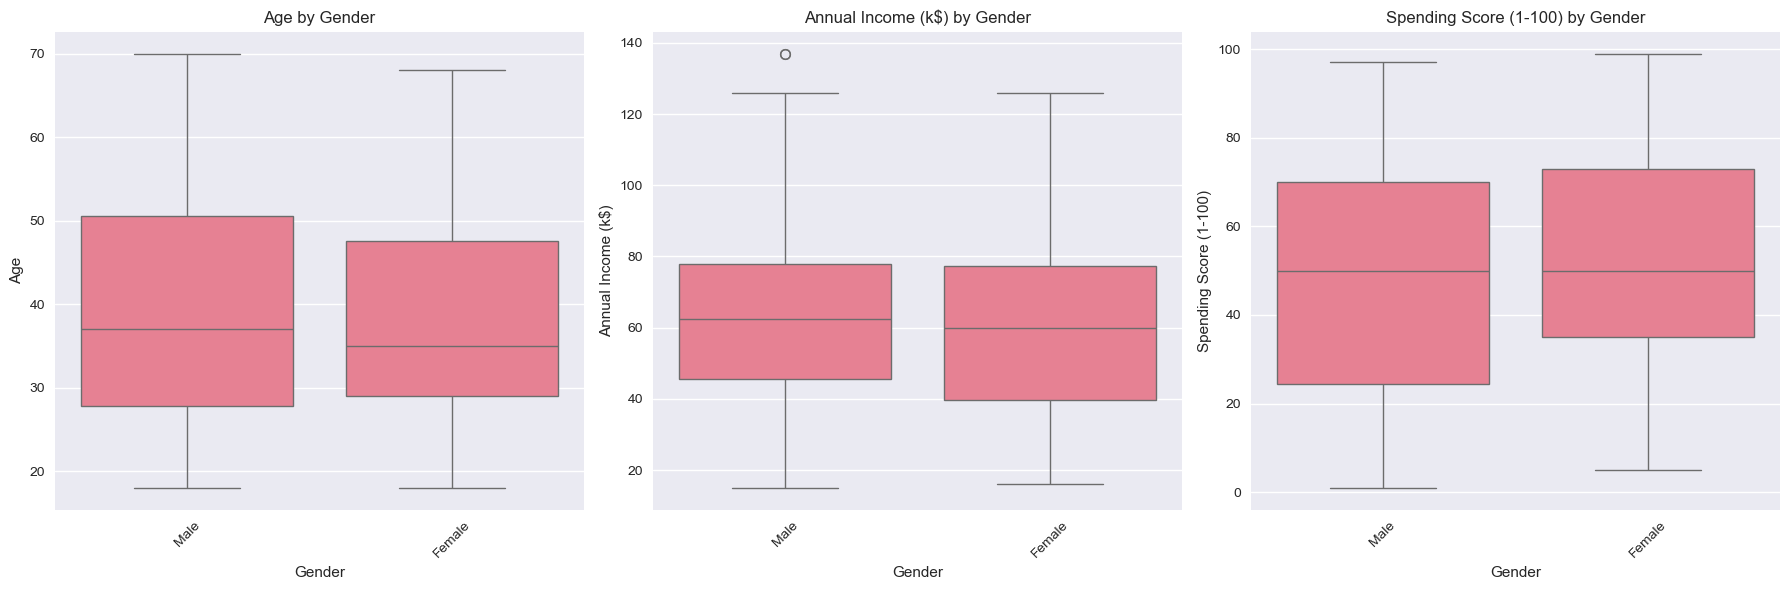

In [14]:
feature_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.ravel()

for i, feature in enumerate(feature_names):
    sns.boxplot(data=df, x='Gender', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Gender')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Part 2: K-Means Clustering

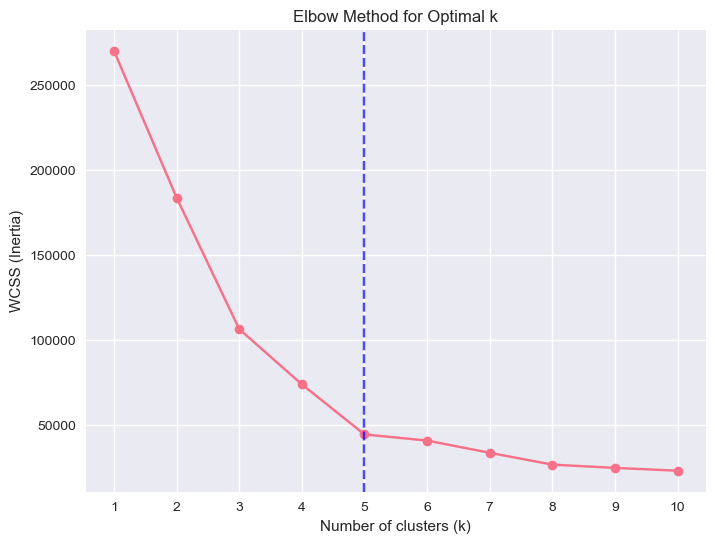

In [20]:

from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1,11))
plt.axvline(x=5, color='blue', linestyle = '--', alpha=0.7, label = 'Optimal k = 5')
plt.show()

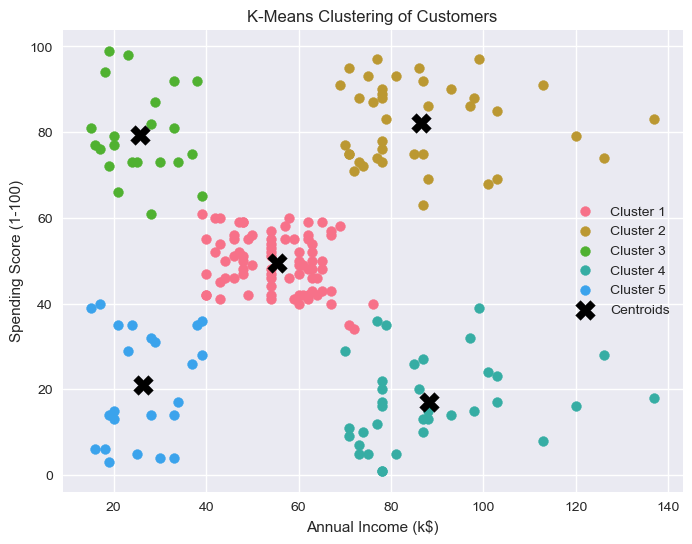

In [21]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))

for i in range(optimal_k):
    plt.scatter(
        X[cluster_labels == i, 0], 
        X[cluster_labels == i, 1], 
        s=50, 
        label=f'Cluster {i+1}'
    )

plt.scatter(
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1], 
    s=200, 
    c='black', 
    marker='X', 
    label='Centroids'
)

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Part 3: Agglomerative Hierarchical Clustering

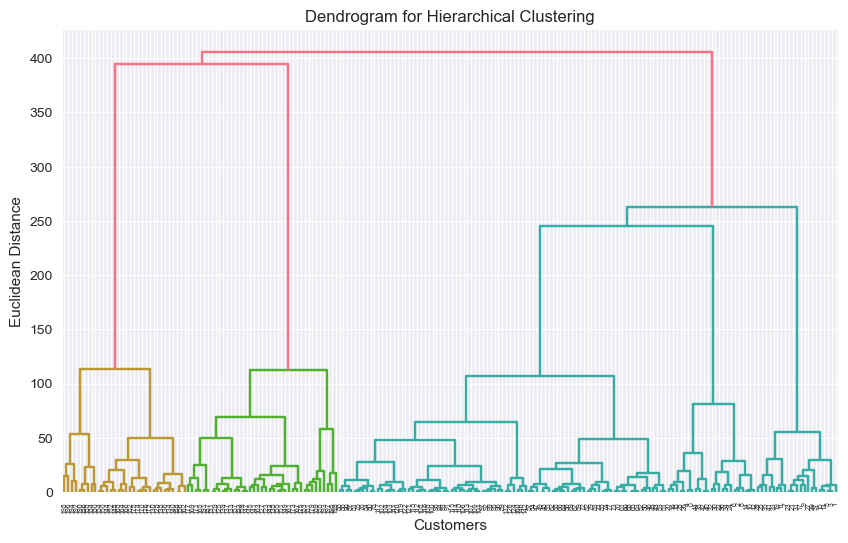

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

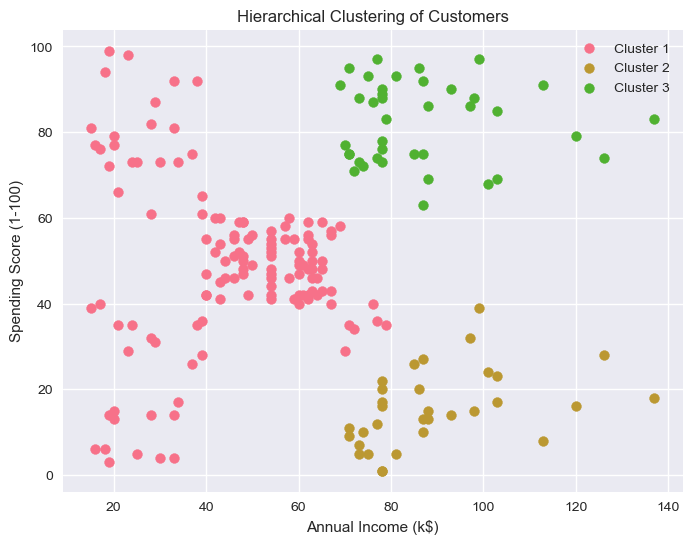

In [27]:
optimal_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hc_labels = hc.fit_predict(X)

plt.figure(figsize=(8,6))

for i in range(optimal_clusters):
    plt.scatter(X[hc_labels == i, 0], X[hc_labels == i, 1],
                s=50, label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Part 4: DBSCAN Clustering

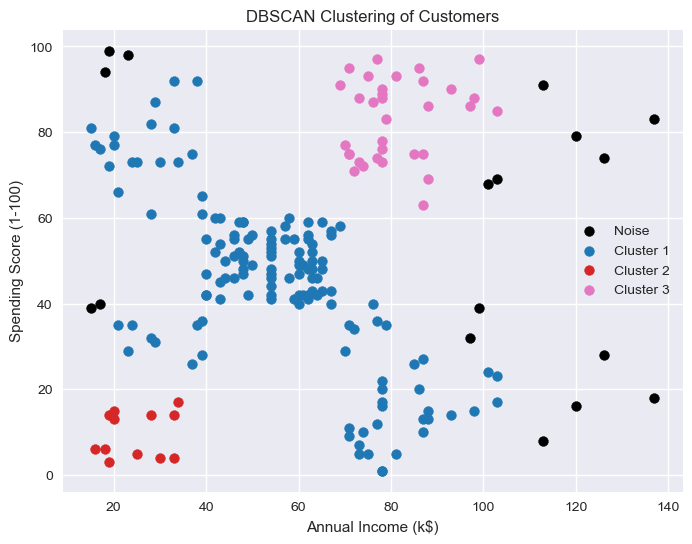

Noise points: 17
Cluster 1 points: 138
Cluster 2 points: 12
Cluster 3 points: 33


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=9)  
db_labels = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(db_labels)

plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    if label == -1:
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=50, c='black', label='Noise')
    else:          
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=50, color=colors(label), label=f'Cluster {label+1}')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

unique_labels, counts = np.unique(db_labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label+1} points: {count}")


In [29]:
from sklearn.metrics import silhouette_score

results = {}

results['KMeans Silhouette'] = silhouette_score(X, cluster_labels)

results['Hierarchical Silhouette'] = silhouette_score(X, hc_labels)

if len(set(db_labels)) > 1:
    mask = db_labels != -1
    if len(set(db_labels[mask])) > 1:
        results['DBSCAN Silhouette'] = silhouette_score(X_scaled[mask], db_labels[mask])
    else:
        results['DBSCAN Silhouette'] = "Not defined (single cluster)"
else:
    results['DBSCAN Silhouette'] = "Not defined (all noise)"

for key, value in results.items():
    print(f"{key}: {value}")

KMeans Silhouette: 0.553931997444648
Hierarchical Silhouette: 0.4618340266628975
DBSCAN Silhouette: 0.3747117046515576


Even though DBSCAN scores slightly higher on the silhouette metric, K-Means is a better choice for this dataset. It creates exactly five clusters and ensures every customer is assigned to a group, which is useful for marketing actions. Its clusters are fairly balanced and easy to understand, fitting the patterns of Annual Income and Spending Score. The slightly lower silhouette score is not as significant as the clear and practical results provided by K-Means.